In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("./kc_house_data.csv", index_col="id")

In [3]:
df = df.drop(columns=["date"]).reset_index(drop=True)

In [4]:
df, df_valid = train_test_split(df, train_size=15_000)

# Some EDA

In [5]:
# Рассмотрим категориальные признаки
df.waterfront.unique(), df.view.unique(), df.condition.unique(), df.grade.unique(), df.floors.unique()

(array([0, 1]),
 array([0, 1, 2, 4, 3]),
 array([4, 3, 5, 2, 1]),
 array([ 7,  8,  6, 11,  9, 10,  4,  5, 12,  3, 13,  1]),
 array([1. , 2. , 3. , 1.5, 2.5, 3.5]))

In [6]:
# Количество различных почтовых индексов
len(df.zipcode.unique())

70

In [7]:
df["log_price"] = np.log1p(df.price)
df_valid["log_price"] = np.log1p(df_valid.price)

<AxesSubplot:xlabel='zipcode'>

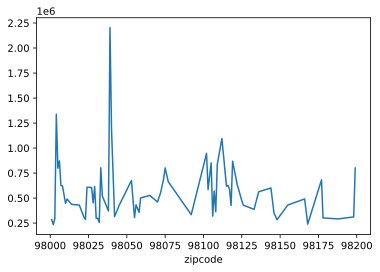

In [8]:
df.groupby("zipcode").price.mean().plot()

<AxesSubplot:xlabel='zipcode'>

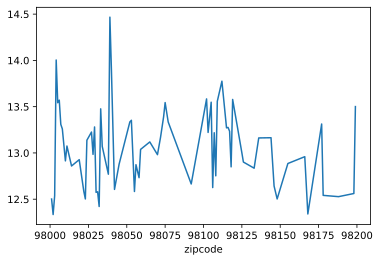

In [9]:
df.groupby("zipcode").log_price.mean().plot()

Сгруппируем почтовые индексы по лог-цене жилья и сделаем категориальный признак

In [10]:
zip_category = {
    0: [14, 14.5],
    1: [13.5, 14],
    2: [13, 13.5],
    3: [12.5, 13],
    4: [12, 12.5],
}

In [11]:
df = df.join((df.groupby("zipcode").log_price.mean()), on="zipcode", how="left", rsuffix="_mean")
df_valid = df_valid.join((df.groupby("zipcode").log_price.mean()), on="zipcode", how="left", rsuffix="_mean")

In [12]:
df_valid

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_price_mean
4882,240000.0,3,1.75,1590,7931,1.0,0,0,3,7,...,400,1979,0,98038,47.3628,-122.050,1680,7931,12.388398,12.770594
10318,800000.0,4,2.75,4600,322188,1.0,0,4,3,10,...,2200,1989,0,98045,47.4626,-121.739,3740,114562,13.592368,12.878735
6441,165000.0,3,1.00,1380,7334,1.0,0,0,3,7,...,400,1981,0,98055,47.4339,-122.192,1910,7859,12.013707,12.583695
15904,728000.0,4,2.50,3290,5951,2.0,0,0,3,9,...,0,2003,0,98075,47.5999,-121.976,3240,6159,13.498058,13.543797
803,625000.0,5,2.50,2990,15085,2.0,0,0,3,9,...,0,2007,0,98011,47.7460,-122.218,3150,13076,13.345509,13.074635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,500000.0,4,2.50,2840,18001,2.0,0,0,3,9,...,0,1994,0,98019,47.7359,-121.962,2500,18001,13.122365,12.927216
3293,257200.0,3,2.00,1850,8250,1.0,0,0,4,7,...,700,1952,0,98002,47.3066,-122.209,1580,7153,12.457613,12.334858
6779,310000.0,1,0.75,520,2885,1.0,0,0,4,6,...,0,1947,0,98117,47.6886,-122.378,980,4241,12.644331,13.234959
4053,400000.0,2,1.00,1470,6120,1.0,0,0,2,7,...,0,1940,0,98115,47.6914,-122.287,1840,6120,12.899222,13.271274


In [13]:
df["zipcode_cat"] = 0
df_valid["zipcode_cat"] = 0
for code, price in zip_category.items():
    df.loc[(price[0] <= df.log_price_mean) &  (df.log_price_mean < price[1]), "zipcode_cat"] = code
    df_valid.loc[(price[0] <= df_valid.log_price_mean) &  (df_valid.log_price_mean < price[1]), "zipcode_cat"] = code

In [14]:
df.yr_renovated.unique()

array([   0, 2010, 2014, 2006, 2011, 1994, 1985, 1993, 1953, 1992, 2007,
       1987, 1999, 1995, 1986, 1981, 1990, 2003, 2000, 1984, 1977, 2013,
       2008, 1982, 1970, 1996, 1963, 1979, 1983, 1991, 2001, 2004, 1989,
       1998, 1975, 2012, 2002, 2005, 1973, 1964, 1960, 1976, 1997, 1974,
       1978, 1967, 1980, 2009, 2015, 1988, 1944, 1951, 1934, 1940, 1968,
       1965, 1969, 1948, 1962, 1959, 1971, 1956, 1955, 1945, 1958, 1957,
       1954, 1950, 1946, 1972])

In [15]:
# Новый бинарный признак: проводилась ли реновация
df["is_renovated"] = (df.yr_renovated > 0).astype(int)
df_valid["is_renovated"] = (df_valid.yr_renovated > 0).astype(int)

# Prepare data

In [16]:
from sklearn.preprocessing import  StandardScaler, OneHotEncoder

In [17]:
cat_features = ["zipcode_cat", "view", "condition", "bedrooms", "grade", "floors"]
bin = ["waterfront", "is_renovated"]
numeric = [
    "bathrooms", 
    "sqft_living", 
    "sqft_lot", 
    "sqft_above", 
    "sqft_basement", 
    "yr_built", 
    "yr_renovated",
    "lat",	
    "long",	
    "sqft_living15",
    "sqft_lot15"
]
target = "log_price"

In [18]:
ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False).fit(df[cat_features])
df_cat = ohe_encoder.transform(df[cat_features])
df_valid_cat = ohe_encoder.transform(df_valid[cat_features])

In [19]:
scaler = StandardScaler().fit(df[numeric])
df_num = scaler.transform(df[numeric])
df_valid_num = scaler.transform(df_valid[numeric])

In [20]:
train = np.concatenate((df[bin], df_cat, df_num), axis=1)
val = np.concatenate((df_valid[bin], df_valid_cat, df_valid_num), axis=1)

# Experiments

In [21]:
from ensembles import RandomForestRMSE, GradientBoostingRMSE

## RF

## n_estimators

In [22]:
model = RandomForestRMSE(max_depth=8, n_estimators=10000)

In [23]:
result = model.fit(
    train, 
    np.array(df.log_price).reshape(-1), 
    val, 
    np.array(df_valid.log_price).reshape(-1),
    trace=True,
    verbose=1000
)

  0%|          | 0/10000 [00:00<?, ?it/s]

Время тренировки 0-ого дерева:  0.020 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.315
#------------------------------#


 10%|█         | 1008/10000 [00:26<03:47, 39.49it/s]

Время тренировки 1000-ого дерева:  0.019 c.
Время валидации 1000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1001 деревьев:  0.223
#------------------------------#


 20%|██        | 2005/10000 [00:52<03:57, 33.61it/s]

Время тренировки 2000-ого дерева:  0.034 c.
Время валидации 2000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 2001 деревьев:  0.222
#------------------------------#


 30%|███       | 3009/10000 [01:17<02:34, 45.27it/s]

Время тренировки 3000-ого дерева:  0.014 c.
Время валидации 3000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 3001 деревьев:  0.223
#------------------------------#


 40%|████      | 4006/10000 [01:42<02:23, 41.86it/s]

Время тренировки 4000-ого дерева:  0.025 c.
Время валидации 4000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 4001 деревьев:  0.223
#------------------------------#


 50%|█████     | 5009/10000 [02:08<02:02, 40.86it/s]

Время тренировки 5000-ого дерева:  0.031 c.
Время валидации 5000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 5001 деревьев:  0.223
#------------------------------#


 60%|██████    | 6009/10000 [02:34<01:34, 42.36it/s]

Время тренировки 6000-ого дерева:  0.020 c.
Время валидации 6000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 6001 деревьев:  0.223
#------------------------------#


 70%|███████   | 7007/10000 [03:00<01:25, 34.96it/s]

Время тренировки 7000-ого дерева:  0.031 c.
Время валидации 7000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 7001 деревьев:  0.223
#------------------------------#


 80%|████████  | 8006/10000 [03:25<00:53, 36.99it/s]

Время тренировки 8000-ого дерева:  0.032 c.
Время валидации 8000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 8001 деревьев:  0.223
#------------------------------#


 90%|█████████ | 9005/10000 [03:51<00:27, 36.28it/s]

Время тренировки 9000-ого дерева:  0.017 c.
Время валидации 9000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 9001 деревьев:  0.223
#------------------------------#


100%|██████████| 10000/10000 [04:17<00:00, 38.77it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 10000
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.333
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  220.75 c.
RMSE ансамбля на валидации:  0.223


In [24]:
check_num_trees =  np.array([10,20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]) - 1

In [25]:
val_score = result[-1]
train_time = result[2]

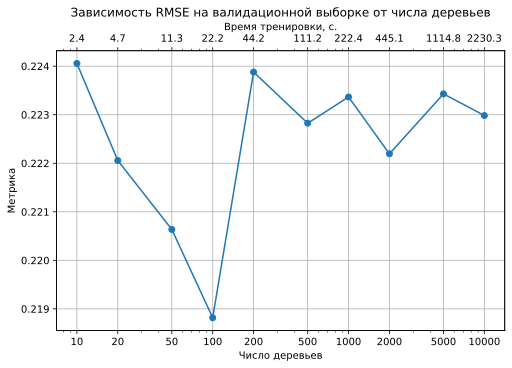

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.array(val_score)[check_num_trees], marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.show()
plt.savefig("./plots/rf_n_estimators.svg")

## feature_subsample_size

In [29]:
feature_subsample_size = [0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]

In [30]:
train_scores = []
val_scores = []
train_time = []
for size in feature_subsample_size:
    model = RandomForestRMSE(
        n_estimators=100,
        max_depth=8,
        feature_subsample_size=size
    )
    result = model.fit(
        train, 
        np.array(df.log_price).reshape(-1), 
        val, 
        np.array(df_valid.log_price).reshape(-1),
        trace=True,
        verbose=100
    )
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[2]))

  8%|▊         | 8/100 [00:00<00:02, 37.40it/s]

Время тренировки 0-ого дерева:  0.018 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.315
#------------------------------#


100%|██████████| 100/100 [00:02<00:00, 40.38it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.300
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  2.09 c.
RMSE ансамбля на валидации:  0.225


  3%|▎         | 3/100 [00:00<00:03, 27.48it/s]

Время тренировки 0-ого дерева:  0.031 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.240
#------------------------------#


100%|██████████| 100/100 [00:03<00:00, 26.55it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.500
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  3.33 c.
RMSE ансамбля на валидации:  0.199


  3%|▎         | 3/100 [00:00<00:04, 20.91it/s]

Время тренировки 0-ого дерева:  0.043 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.241
#------------------------------#


100%|██████████| 100/100 [00:04<00:00, 23.00it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.600
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  3.88 c.
RMSE ансамбля на валидации:  0.195


  2%|▏         | 2/100 [00:00<00:05, 19.32it/s]

Время тренировки 0-ого дерева:  0.047 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.236
#------------------------------#


100%|██████████| 100/100 [00:05<00:00, 19.29it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  4.65 c.
RMSE ансамбля на валидации:  0.192


  2%|▏         | 2/100 [00:00<00:05, 17.65it/s]

Время тренировки 0-ого дерева:  0.054 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.239
#------------------------------#


100%|██████████| 100/100 [00:05<00:00, 17.06it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.800
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  5.31 c.
RMSE ансамбля на валидации:  0.193


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

Время тренировки 0-ого дерева:  0.055 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.241
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.850
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  5.77 c.
RMSE ансамбля на валидации:  0.194


  2%|▏         | 2/100 [00:00<00:06, 15.14it/s]

Время тренировки 0-ого дерева:  0.065 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.239
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 14.91it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.900
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  6.10 c.
RMSE ансамбля на валидации:  0.195


  2%|▏         | 2/100 [00:00<00:06, 15.27it/s]

Время тренировки 0-ого дерева:  0.062 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.236
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.950
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  6.37 c.
RMSE ансамбля на валидации:  0.196


  2%|▏         | 2/100 [00:00<00:06, 14.24it/s]

Время тренировки 0-ого дерева:  0.064 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.234
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 14.33it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  1.000
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  6.41 c.
RMSE ансамбля на валидации:  0.198


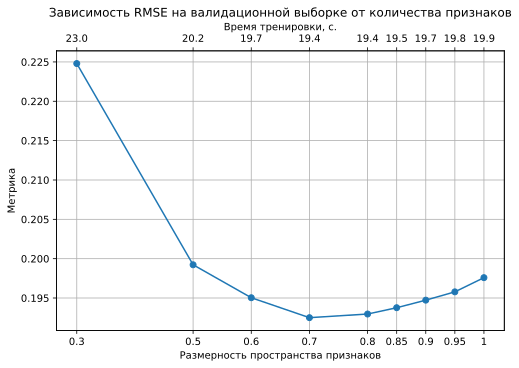

<Figure size 432x288 with 0 Axes>

In [31]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(feature_subsample_size, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Метрика")

ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.show()
plt.savefig("./plots/rf_feature_full.svg")

## max_depth

In [32]:
max_depth = [None, 3, 5, 6, 7, 8, 10, 12]

In [33]:
val_scores = []
train_time = []
for depth in max_depth:
    model = RandomForestRMSE(
        n_estimators=100,
        max_depth=depth,
        feature_subsample_size=0.7
    )
    result = model.fit(
        train, 
        np.array(df.log_price).reshape(-1), 
        val, 
        np.array(df_valid.log_price).reshape(-1),
        trace=True,
        verbose=100
    )
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[2]))

  2%|▏         | 2/100 [00:00<00:11,  8.52it/s]

Время тренировки 0-ого дерева:  0.112 c.
Время валидации 0-ого дерева:  0.003 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.275
#------------------------------#


100%|██████████| 100/100 [00:09<00:00, 10.49it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: None
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  8.76 c.
RMSE ансамбля на валидации:  0.176


  4%|▍         | 4/100 [00:00<00:02, 38.74it/s]

Время тренировки 0-ого дерева:  0.021 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.304
#------------------------------#


100%|██████████| 100/100 [00:02<00:00, 35.04it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  2.21 c.
RMSE ансамбля на валидации:  0.274


  3%|▎         | 3/100 [00:00<00:03, 25.51it/s]

Время тренировки 0-ого дерева:  0.032 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.260
#------------------------------#


100%|██████████| 100/100 [00:03<00:00, 27.11it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 5
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  3.13 c.
RMSE ансамбля на валидации:  0.227


  3%|▎         | 3/100 [00:00<00:04, 20.94it/s]

Время тренировки 0-ого дерева:  0.041 c.
Время валидации 0-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.249
#------------------------------#


100%|██████████| 100/100 [00:04<00:00, 24.20it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 6
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  3.60 c.
RMSE ансамбля на валидации:  0.212


  3%|▎         | 3/100 [00:00<00:04, 19.57it/s]

Время тренировки 0-ого дерева:  0.042 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.247
#------------------------------#


100%|██████████| 100/100 [00:04<00:00, 21.60it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 7
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  4.08 c.
RMSE ансамбля на валидации:  0.201


  2%|▏         | 2/100 [00:00<00:05, 18.91it/s]

Время тренировки 0-ого дерева:  0.047 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.240
#------------------------------#


100%|██████████| 100/100 [00:05<00:00, 19.55it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  4.54 c.
RMSE ансамбля на валидации:  0.193


  2%|▏         | 2/100 [00:00<00:06, 15.93it/s]

Время тренировки 0-ого дерева:  0.057 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.245
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 10
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  5.49 c.
RMSE ансамбля на валидации:  0.183


  2%|▏         | 2/100 [00:00<00:07, 13.84it/s]

Время тренировки 0-ого дерева:  0.065 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  0.247
#------------------------------#


100%|██████████| 100/100 [00:06<00:00, 14.67it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 100
|-> Макс. глубина дерева: 12
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  6.22 c.
RMSE ансамбля на валидации:  0.178


In [34]:
max_depth[0] = -1

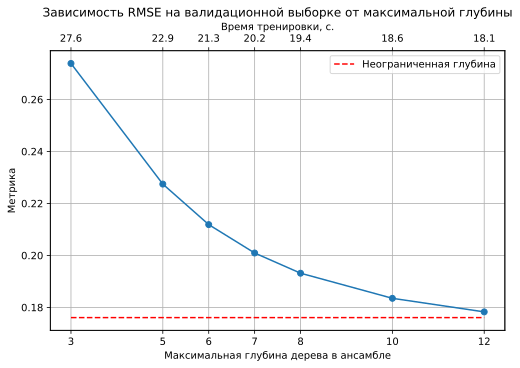

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(max_depth[1:], val_scores[1:], marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от максимальной глубины")
ax.set_xlabel("Максимальная глубина дерева в ансамбле")
ax.set_ylabel("Метрика")
ax.set_xticks(max_depth[1:])
plt.grid("on")

ax.hlines(val_scores[0], xmin=3, xmax=12, label="Неограниченная глубина", linestyles="dashed", colors="red")
plt.legend()

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time[1:], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.show()
plt.savefig("./plots/rf_depth.svg")

# GB

## n_estimators

In [22]:
from seaborn import scatterplot

In [54]:
model = GradientBoostingRMSE(max_depth=3, learning_rate=0.1, n_estimators=10000)

In [55]:
result = model.fit(
    train, 
    np.array(df.log_price).reshape(-1), 
    val, 
    np.array(df_valid.log_price).reshape(-1),
    trace=True,
    verbose=1000
)

  0%|          | 0/10000 [00:00<?, ?it/s]

Время тренировки 0-ого дерева:  0.012
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.753
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


 10%|█         | 1014/10000 [00:11<01:42, 87.88it/s]

Время тренировки 1000-ого дерева:  0.010
RMSE на тренировочной выборке для бустинга из 1001 дерева:  0.136
RMSE на валидационной выборке для бустинга из 1001 дерева:  0.168
#------------------------------------------------------#


 20%|██        | 2011/10000 [00:22<01:26, 92.09it/s]

Время тренировки 2000-ого дерева:  0.015
RMSE на тренировочной выборке для бустинга из 2001 дерева:  0.119
RMSE на валидационной выборке для бустинга из 2001 дерева:  0.167
#------------------------------------------------------#


 30%|███       | 3018/10000 [00:33<01:18, 89.31it/s]

Время тренировки 3000-ого дерева:  0.007
RMSE на тренировочной выборке для бустинга из 3001 дерева:  0.108
RMSE на валидационной выборке для бустинга из 3001 дерева:  0.168
#------------------------------------------------------#


 40%|████      | 4015/10000 [00:44<01:04, 92.45it/s]

Время тренировки 4000-ого дерева:  0.011
RMSE на тренировочной выборке для бустинга из 4001 дерева:  0.098
RMSE на валидационной выборке для бустинга из 4001 дерева:  0.169
#------------------------------------------------------#


 50%|█████     | 5020/10000 [00:55<00:53, 92.85it/s] 

Время тренировки 5000-ого дерева:  0.015
RMSE на тренировочной выборке для бустинга из 5001 дерева:  0.091
RMSE на валидационной выборке для бустинга из 5001 дерева:  0.170
#------------------------------------------------------#


 60%|██████    | 6016/10000 [01:06<00:44, 89.11it/s]

Время тренировки 6000-ого дерева:  0.010
RMSE на тренировочной выборке для бустинга из 6001 дерева:  0.085
RMSE на валидационной выборке для бустинга из 6001 дерева:  0.171
#------------------------------------------------------#


 70%|███████   | 7013/10000 [01:17<00:35, 84.00it/s] 

Время тренировки 7000-ого дерева:  0.014
RMSE на тренировочной выборке для бустинга из 7001 дерева:  0.079
RMSE на валидационной выборке для бустинга из 7001 дерева:  0.172
#------------------------------------------------------#


 80%|████████  | 8010/10000 [01:28<00:22, 89.03it/s] 

Время тренировки 8000-ого дерева:  0.015
RMSE на тренировочной выборке для бустинга из 8001 дерева:  0.075
RMSE на валидационной выборке для бустинга из 8001 дерева:  0.173
#------------------------------------------------------#


 90%|█████████ | 9009/10000 [01:39<00:10, 92.84it/s]

Время тренировки 9000-ого дерева:  0.008
RMSE на тренировочной выборке для бустинга из 9001 дерева:  0.070
RMSE на валидационной выборке для бустинга из 9001 дерева:  0.174
#------------------------------------------------------#


100%|██████████| 10000/10000 [01:49<00:00, 91.02it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 10000
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.333
|-> Learning rate: 0.1
Время тренировки ансамбля:  104.06 c.
RMSE бустинга на тренировке:  0.066
RMSE бустинга на валидации:  0.175


In [56]:
check_num_trees = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]) - 1

In [57]:
val_score = result[-1]
train_score = result[0]
train_time = result[1]

/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_5022/105274694.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


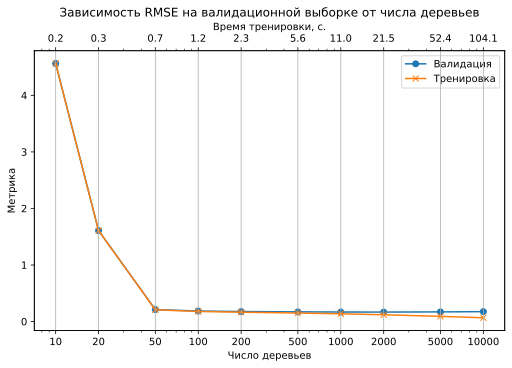

<Figure size 432x288 with 0 Axes>

In [58]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.array(val_score)[check_num_trees], marker="o", label="Валидация")
ax.plot(check_num_trees + 1, np.array(train_score)[check_num_trees], marker="x", label="Тренировка")

ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)
plt.legend()

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom


plt.grid("on")
fig.show()
plt.show()

plt.savefig("./plots/gb_n_estimators_full.svg")

/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_5022/1193735577.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


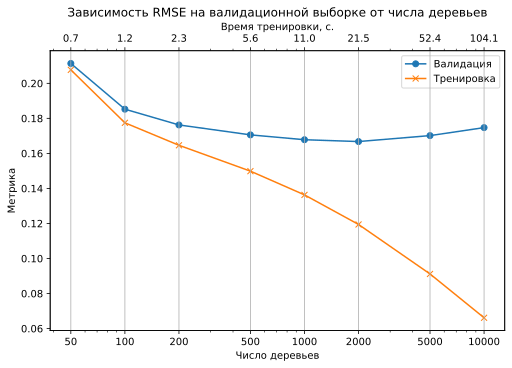

<Figure size 432x288 with 0 Axes>

In [59]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(check_num_trees[2:] + 1, np.array(val_score)[check_num_trees[2:]], marker="o", label="Валидация")
ax.plot(check_num_trees[2:] + 1, np.array(train_score)[check_num_trees[2:]], marker="x", label="Тренировка")

ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees[2:] + 1)
ax.set_xticklabels(labels=check_num_trees[2:] + 1)
plt.legend()

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees[2:]], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom


plt.grid("on")
fig.show()
plt.show()

plt.savefig("./plots/gb_n_estimators.svg")

## feature_subsample_size

In [29]:
feature_subsample_size = [0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]

In [30]:
train_scores = []
val_scores = []
train_time = []
for size in feature_subsample_size:
    model = GradientBoostingRMSE(
        n_estimators=500,
        max_depth=3,
        feature_subsample_size=size
    )
    result = model.fit(
        train, 
        np.array(df.log_price).reshape(-1), 
        val, 
        np.array(df_valid.log_price).reshape(-1),
        trace=True,
        verbose=1000
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))


  2%|▏         | 8/500 [00:00<00:06, 77.91it/s]

Время тренировки 0-ого дерева:  0.010
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.753
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:05<00:00, 94.82it/s] 


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.300
|-> Learning rate: 0.1
Время тренировки ансамбля:  4.96 c.
RMSE бустинга на тренировке:  0.151
RMSE бустинга на валидации:  0.170


  1%|▏         | 7/500 [00:00<00:07, 65.11it/s]

Время тренировки 0-ого дерева:  0.015
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:08<00:00, 60.47it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.500
|-> Learning rate: 0.1
Время тренировки ансамбля:  7.88 c.
RMSE бустинга на тренировке:  0.148
RMSE бустинга на валидации:  0.169


  1%|          | 6/500 [00:00<00:09, 51.25it/s]

Время тренировки 0-ого дерева:  0.020
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:09<00:00, 52.34it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.600
|-> Learning rate: 0.1
Время тренировки ансамбля:  9.13 c.
RMSE бустинга на тренировке:  0.147
RMSE бустинга на валидации:  0.169


  1%|          | 5/500 [00:00<00:11, 41.83it/s]

Время тренировки 0-ого дерева:  0.023
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:11<00:00, 44.87it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.1
Время тренировки ансамбля:  10.67 c.
RMSE бустинга на тренировке:  0.146
RMSE бустинга на валидации:  0.169


  1%|          | 4/500 [00:00<00:13, 37.73it/s]

Время тренировки 0-ого дерева:  0.026
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:12<00:00, 38.97it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  12.32 c.
RMSE бустинга на тренировке:  0.146
RMSE бустинга на валидации:  0.168


  1%|          | 4/500 [00:00<00:13, 36.87it/s]

Время тренировки 0-ого дерева:  0.026
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:13<00:00, 36.85it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.850
|-> Learning rate: 0.1
Время тренировки ансамбля:  13.03 c.
RMSE бустинга на тренировке:  0.146
RMSE бустинга на валидации:  0.169


  1%|          | 4/500 [00:00<00:14, 35.39it/s]

Время тренировки 0-ого дерева:  0.027
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 35.05it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.900
|-> Learning rate: 0.1
Время тренировки ансамбля:  13.72 c.
RMSE бустинга на тренировке:  0.146
RMSE бустинга на валидации:  0.169


  1%|          | 4/500 [00:00<00:14, 33.28it/s]

Время тренировки 0-ого дерева:  0.030
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 33.43it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.950
|-> Learning rate: 0.1
Время тренировки ансамбля:  14.40 c.
RMSE бустинга на тренировке:  0.145
RMSE бустинга на валидации:  0.168


/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_5022/407165424.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


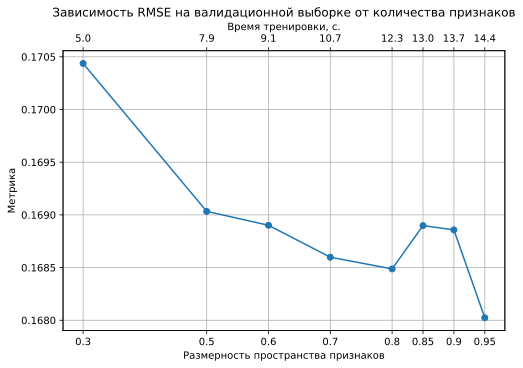

<Figure size 432x288 with 0 Axes>

In [31]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(feature_subsample_size, val_scores, marker="o")

ax.set_title("Зависимость RMSE на валидационной выборке от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Метрика")
ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

fig.show()
plt.show()

plt.savefig("./plots/gb_features.svg")

## max_depth

In [32]:
max_depth = [1, 2, 3, 4, 5, 8, 10]

In [33]:
train_scores = []

val_scores = []
train_time = []
for depth in max_depth:
    model = GradientBoostingRMSE(
        n_estimators=500,
        max_depth=depth,
        feature_subsample_size=0.8
    )
    result = model.fit(
        train, 
        np.array(df.log_price).reshape(-1), 
        val, 
        np.array(df_valid.log_price).reshape(-1),
        trace=True,
        verbose=500
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  3%|▎         | 13/500 [00:00<00:07, 66.73it/s]

Время тренировки 0-ого дерева:  0.024
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.753
RMSE на валидационной выборке для бустинга из 1 дерева:  11.757
#------------------------------------------------------#


100%|██████████| 500/500 [00:05<00:00, 83.58it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 1
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  5.49 c.
RMSE бустинга на тренировке:  0.188
RMSE бустинга на валидации:  0.192


  1%|          | 5/500 [00:00<00:11, 42.51it/s]

Время тренировки 0-ого дерева:  0.020
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.753
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:09<00:00, 51.47it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 2
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  9.18 c.
RMSE бустинга на тренировке:  0.164
RMSE бустинга на валидации:  0.175


  1%|          | 4/500 [00:00<00:13, 37.69it/s]

Время тренировки 0-ого дерева:  0.026
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:13<00:00, 37.68it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  12.70 c.
RMSE бустинга на тренировке:  0.146
RMSE бустинга на валидации:  0.168


  1%|          | 4/500 [00:00<00:16, 30.03it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.755
#------------------------------------------------------#


100%|██████████| 500/500 [00:16<00:00, 30.27it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  15.97 c.
RMSE бустинга на тренировке:  0.129
RMSE бустинга на валидации:  0.166


  1%|          | 3/500 [00:00<00:20, 24.84it/s]

Время тренировки 0-ого дерева:  0.039
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.755
#------------------------------------------------------#


100%|██████████| 500/500 [00:19<00:00, 25.22it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 5
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  19.26 c.
RMSE бустинга на тренировке:  0.109
RMSE бустинга на валидации:  0.166


  0%|          | 2/500 [00:00<00:28, 17.40it/s]

Время тренировки 0-ого дерева:  0.058
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.755
#------------------------------------------------------#


100%|██████████| 500/500 [00:30<00:00, 16.22it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  30.14 c.
RMSE бустинга на тренировке:  0.047
RMSE бустинга на валидации:  0.171


  0%|          | 2/500 [00:00<00:36, 13.57it/s]

Время тренировки 0-ого дерева:  0.073
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.755
#------------------------------------------------------#


100%|██████████| 500/500 [00:37<00:00, 13.22it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 10
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  37.14 c.
RMSE бустинга на тренировке:  0.028
RMSE бустинга на валидации:  0.176


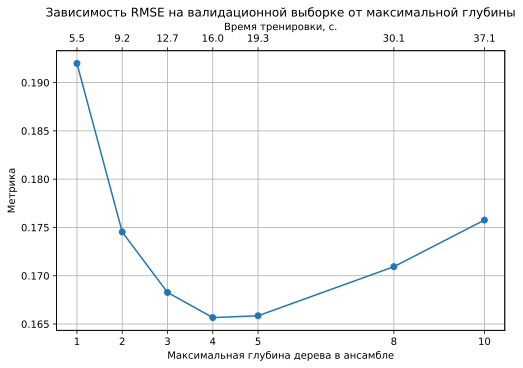

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(max_depth, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от максимальной глубины")
ax.set_xlabel("Максимальная глубина дерева в ансамбле")
ax.set_ylabel("Метрика")
ax.set_xticks(max_depth)

plt.grid("on")
ax2 = ax.twiny()
ax2.set_xticks(max_depth)
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.show()
plt.savefig("./plots/gb_depth.svg")

## learning rate

In [42]:
learning_rate = [1, 0.1, 0.01, 0.001, 0.0001]

In [43]:
train_scores = []
val_scores = []
train_time = []
for lr in learning_rate:
    model = GradientBoostingRMSE(
        max_depth=4,
        n_estimators=500,
        feature_subsample_size=0.7, 
        learning_rate=lr
    )
    result = model.fit(
        train, 
        np.array(df.log_price).reshape(-1), 
        val, 
        np.array(df_valid.log_price).reshape(-1),
        trace=True,
        verbose=500
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  1%|▏         | 7/500 [00:00<00:16, 29.63it/s]

Время тренировки 0-ого дерева:  0.039
RMSE на тренировочной выборке для бустинга из 1 дерева:  0.274
RMSE на валидационной выборке для бустинга из 1 дерева:  0.277
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 33.51it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 1
Время тренировки ансамбля:  14.36 c.
RMSE бустинга на тренировке:  0.065
RMSE бустинга на валидации:  0.229


  1%|          | 4/500 [00:00<00:16, 29.55it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  11.752
RMSE на валидационной выборке для бустинга из 1 дерева:  11.756
#------------------------------------------------------#


100%|██████████| 500/500 [00:15<00:00, 32.43it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.1
Время тренировки ансамбля:  14.79 c.
RMSE бустинга на тренировке:  0.129
RMSE бустинга на валидации:  0.167


  1%|          | 4/500 [00:00<00:15, 32.99it/s]

Время тренировки 0-ого дерева:  0.030
RMSE на тренировочной выборке для бустинга из 1 дерева:  12.927
RMSE на валидационной выборке для бустинга из 1 дерева:  12.930
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 33.47it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.01
Время тренировки ансамбля:  14.35 c.
RMSE бустинга на тренировке:  0.197
RMSE бустинга на валидации:  0.206


  1%|          | 4/500 [00:00<00:14, 33.55it/s]

Время тренировки 0-ого дерева:  0.028
RMSE на тренировочной выборке для бустинга из 1 дерева:  13.044
RMSE на валидационной выборке для бустинга из 1 дерева:  13.048
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 33.38it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.001
Время тренировки ансамбля:  14.37 c.
RMSE бустинга на тренировке:  7.921
RMSE бустинга на валидации:  7.924


  1%|          | 3/500 [00:00<00:17, 29.01it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  13.056
RMSE на валидационной выборке для бустинга из 1 дерева:  13.060
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 33.34it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.0001
Время тренировки ансамбля:  14.37 c.
RMSE бустинга на тренировке:  12.421
RMSE бустинга на валидации:  12.424


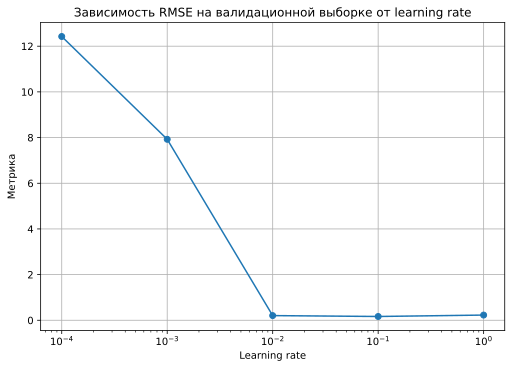

<Figure size 432x288 with 0 Axes>

In [47]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(learning_rate, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от learning rate")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(learning_rate)
plt.grid("on")

plt.show()
plt.savefig("./plots/gb_lr_full.svg")

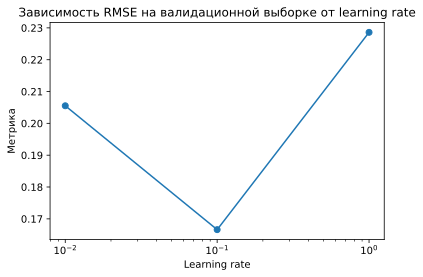

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(list(reversed(learning_rate[:3])), list(reversed(val_scores[:3])), marker="o")
plt.title("Зависимость RMSE на валидационной выборке от learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Метрика")
plt.xscale("log")


plt.show()
plt.savefig("./plots/gb_lr.svg")